# 연합뉴스 타이틀 주제 분류

In [4]:
# 판다스, 넘파이, 시본, 맷플롯립을 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, platform

# 한글 폰토
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [2]:
!pip install koreanize-matplotlib
!pip install konlypy --upgrade
!pip install tqdm --upgrade

ERROR: Could not find a version that satisfies the requirement konlypy (from versions: none)
ERROR: No matching distribution found for konlypy


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 2.1.1 requires sentencepiece, which is not installed.



  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/48/5d/acf5905c36149bbaec41ccf7f2b68814647347b72075ac0b1fe3022fdc73/tqdm-4.66.5-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB ? eta 0:00:00
   ---------------------------------------- 0.0/78.4 kB ? eta -:--:--
   ---------------------------------------- 78.4/78.4 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0


## 데이터 불러오기

In [5]:
# 학습 / 시험 데이터 세트를 읽어서 train과 test 변수에 입력
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
train.shape, test.shape

((45654, 3), (9131, 2))

In [6]:
# 토픽을 불러온다
topic = pd.read_csv('topic_dict.csv')
topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [7]:
topic['topic'].values

array(['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치'], dtype=object)

In [8]:
train.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [9]:
test.head()

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


## 데이터 전처리하기

In [10]:
# 전처리를 위해 데이터 병합
raw = pd.concat([train,test])
raw.shape

(54785, 3)

In [11]:
raw.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0


In [12]:
raw.tail()

,index,title,topic_idx
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN
9130,54784,유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구,NaN


In [13]:
df = raw.merge(topic, how='left')
df.shape

(54785, 4)

In [14]:
df.head()

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계


In [15]:
# test는 topic이 결측치이므로 빈도수에 포함되지 않는다
df['topic_idx'].value_counts()

4.0    7629
2.0    7362
5.0    6933
6.0    6751
1.0    6222
3.0    5933
0.0    4824
Name: topic_idx, dtype: int64

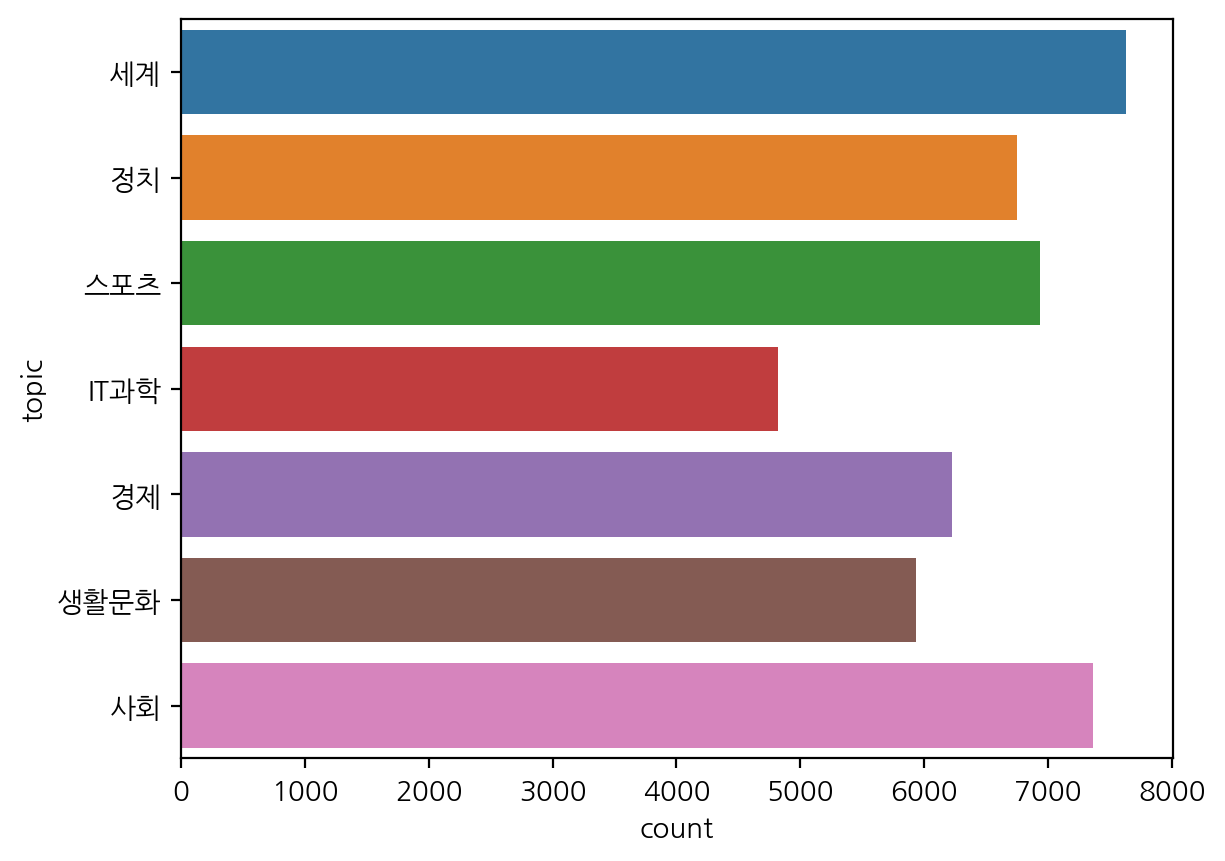

In [17]:
sns.countplot(data=df, y='topic')
plt.show()

결과를 보면 뉴스 기사의 토픽별로 세계에 해당하는 문서가 가장 많고, IT과학에 해당하는 문서가 가장 적다. 이처럼 데이터 불균형이 있을 때는 어떻게 할까? 무작위 추출을 통해 데이터가 가장 적은 'IT과학'의 개수에 맞춰 다른 토픽의 데이터를 삭제할 수도 있고(Under-Sampling), 아니면 'IT과학'의 개수를 늘려서 가장 개수가 많은 '세계'에 맞출 수도 있다.(Over-Sampling)

In [18]:
df['len'] = df['title'].apply(lambda x : len(x))
df['word_count'] = df['title'].apply(lambda x :len(x.split()))
df['unique_word_count'] = df['title'].apply(lambda x : len(set(x.split())))
df.head()

,index,title,topic_idx,topic,len,word_count,unique_word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7


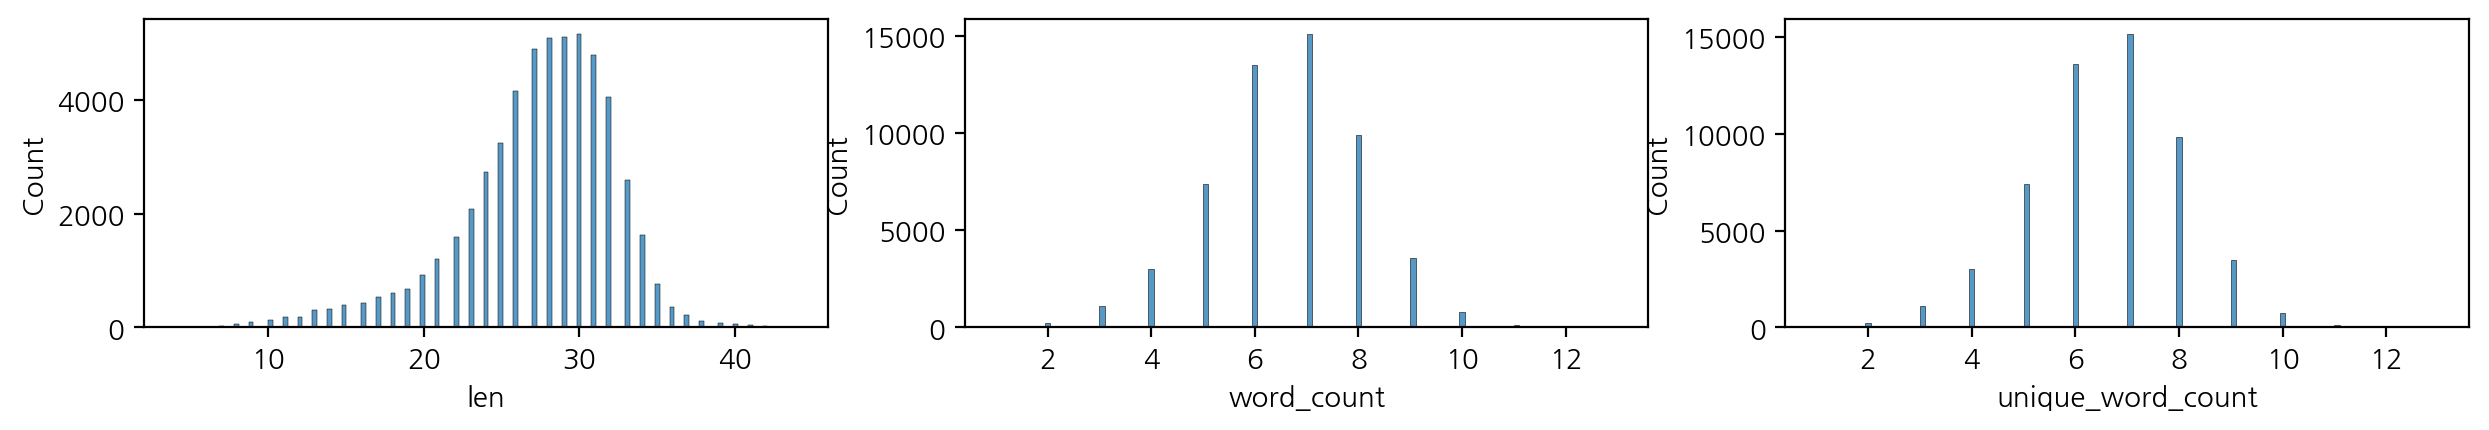

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15,2))
sns.histplot(df['len'], ax=axes[0])
sns.histplot(df['word_count'], ax=axes[1])
sns.histplot(df['unique_word_count'], ax=axes[2])
plt.show()

연합뉴스 기사에서 제목만 추출했기 때문에 글자수 20~30개 사이에 빈도수가 몰려 있다. 단어 수도 6~8개 내외로 구성되어 있다.

In [21]:
df[['len', 'word_count', 'unique_word_count']].describe().T

,count,mean,std,min,25%,50%,75%,max
len,54785.0,27.318846,4.947738,4.0,25.0,28.0,31.0,44.0
word_count,54785.0,6.587880,1.471852,1.0,6.0,7.0,8.0,13.0
unique_word_count,54785.0,6.576198,1.465320,1.0,6.0,7.0,8.0,13.0


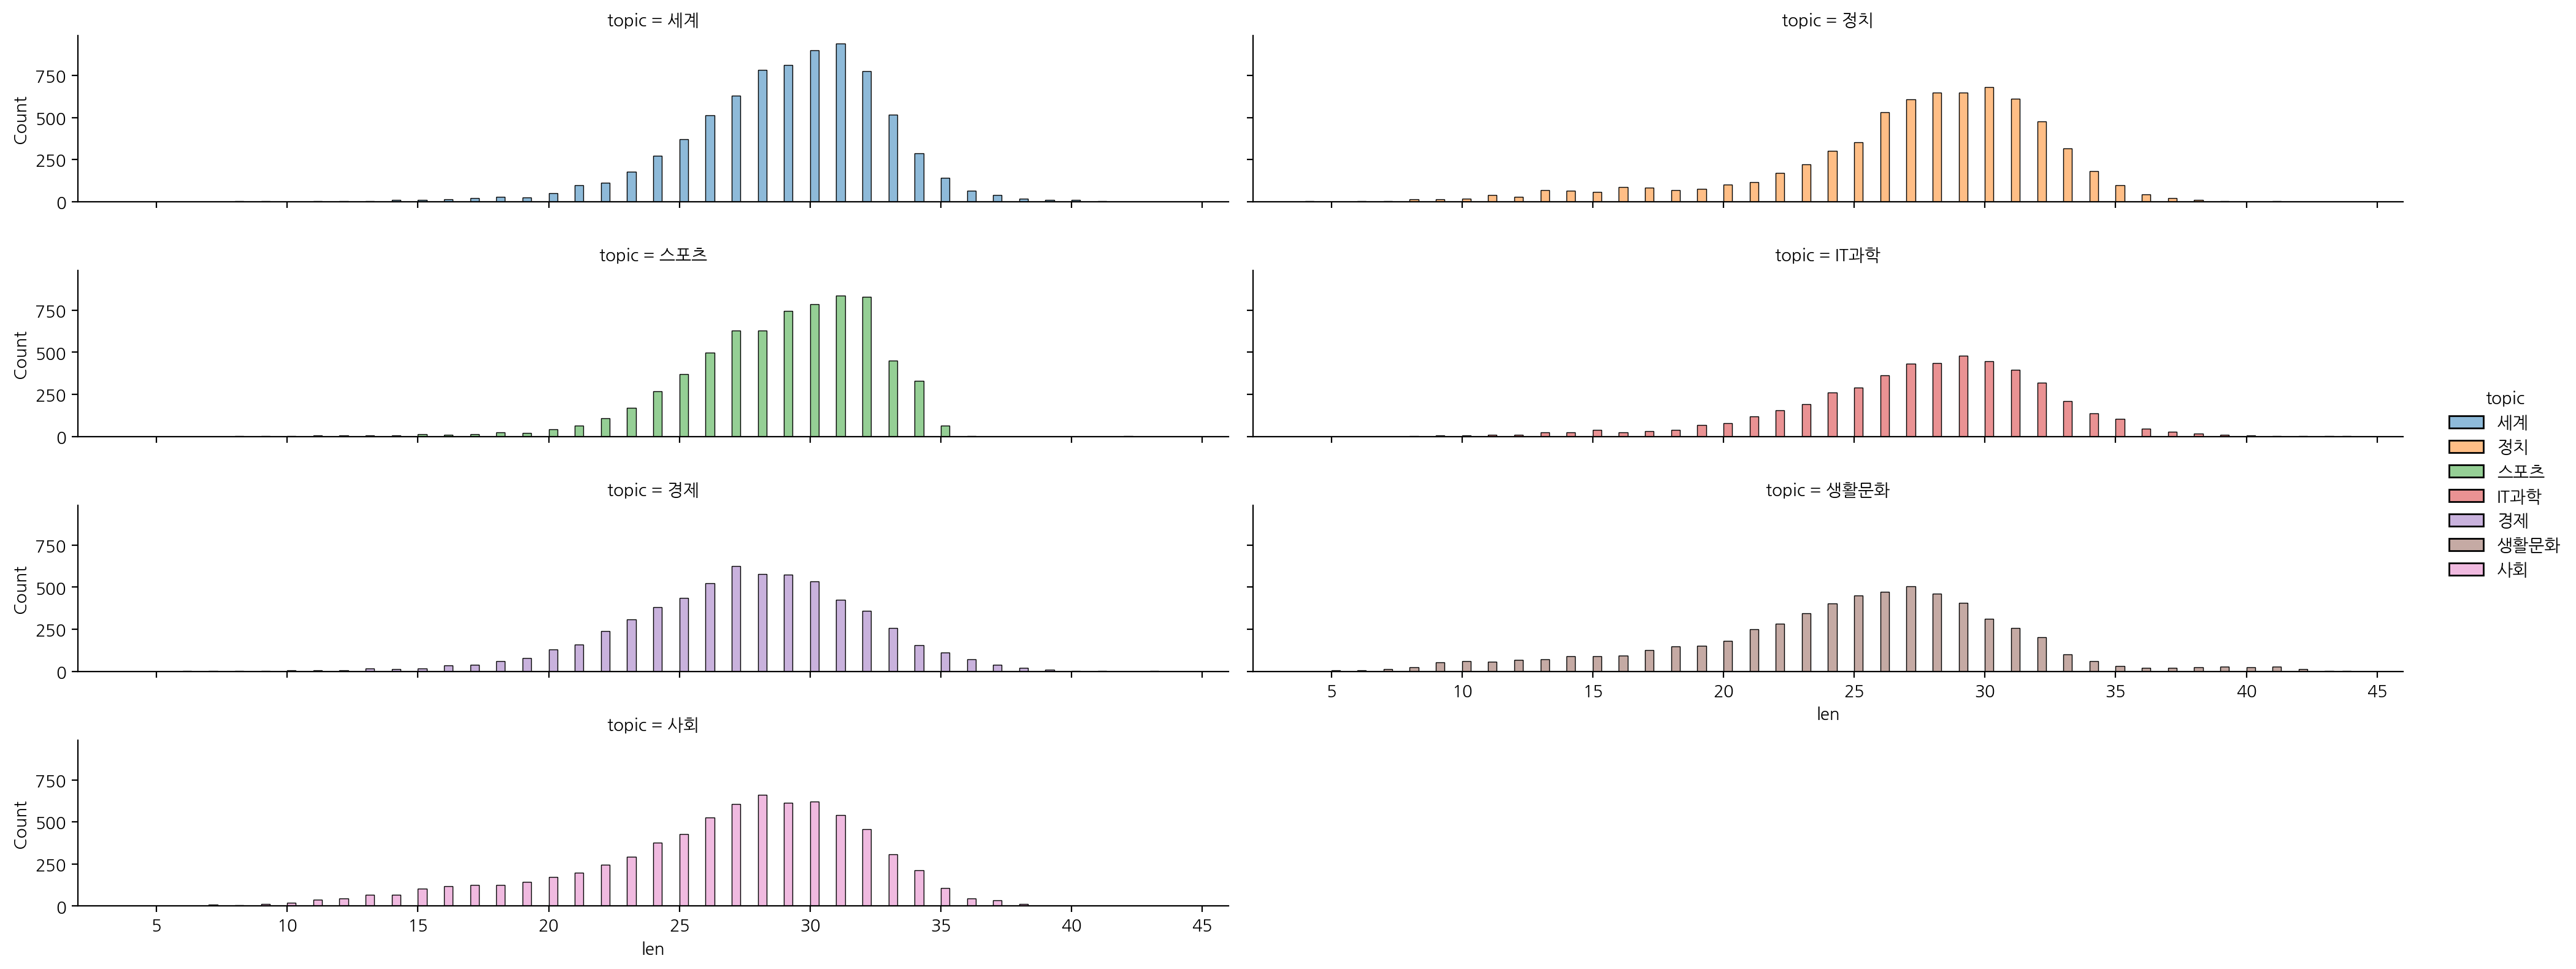

In [23]:
sns.displot(data=df, x='len',
            hue='topic', col='topic', col_wrap=2, aspect=5, height=2)
plt.show()

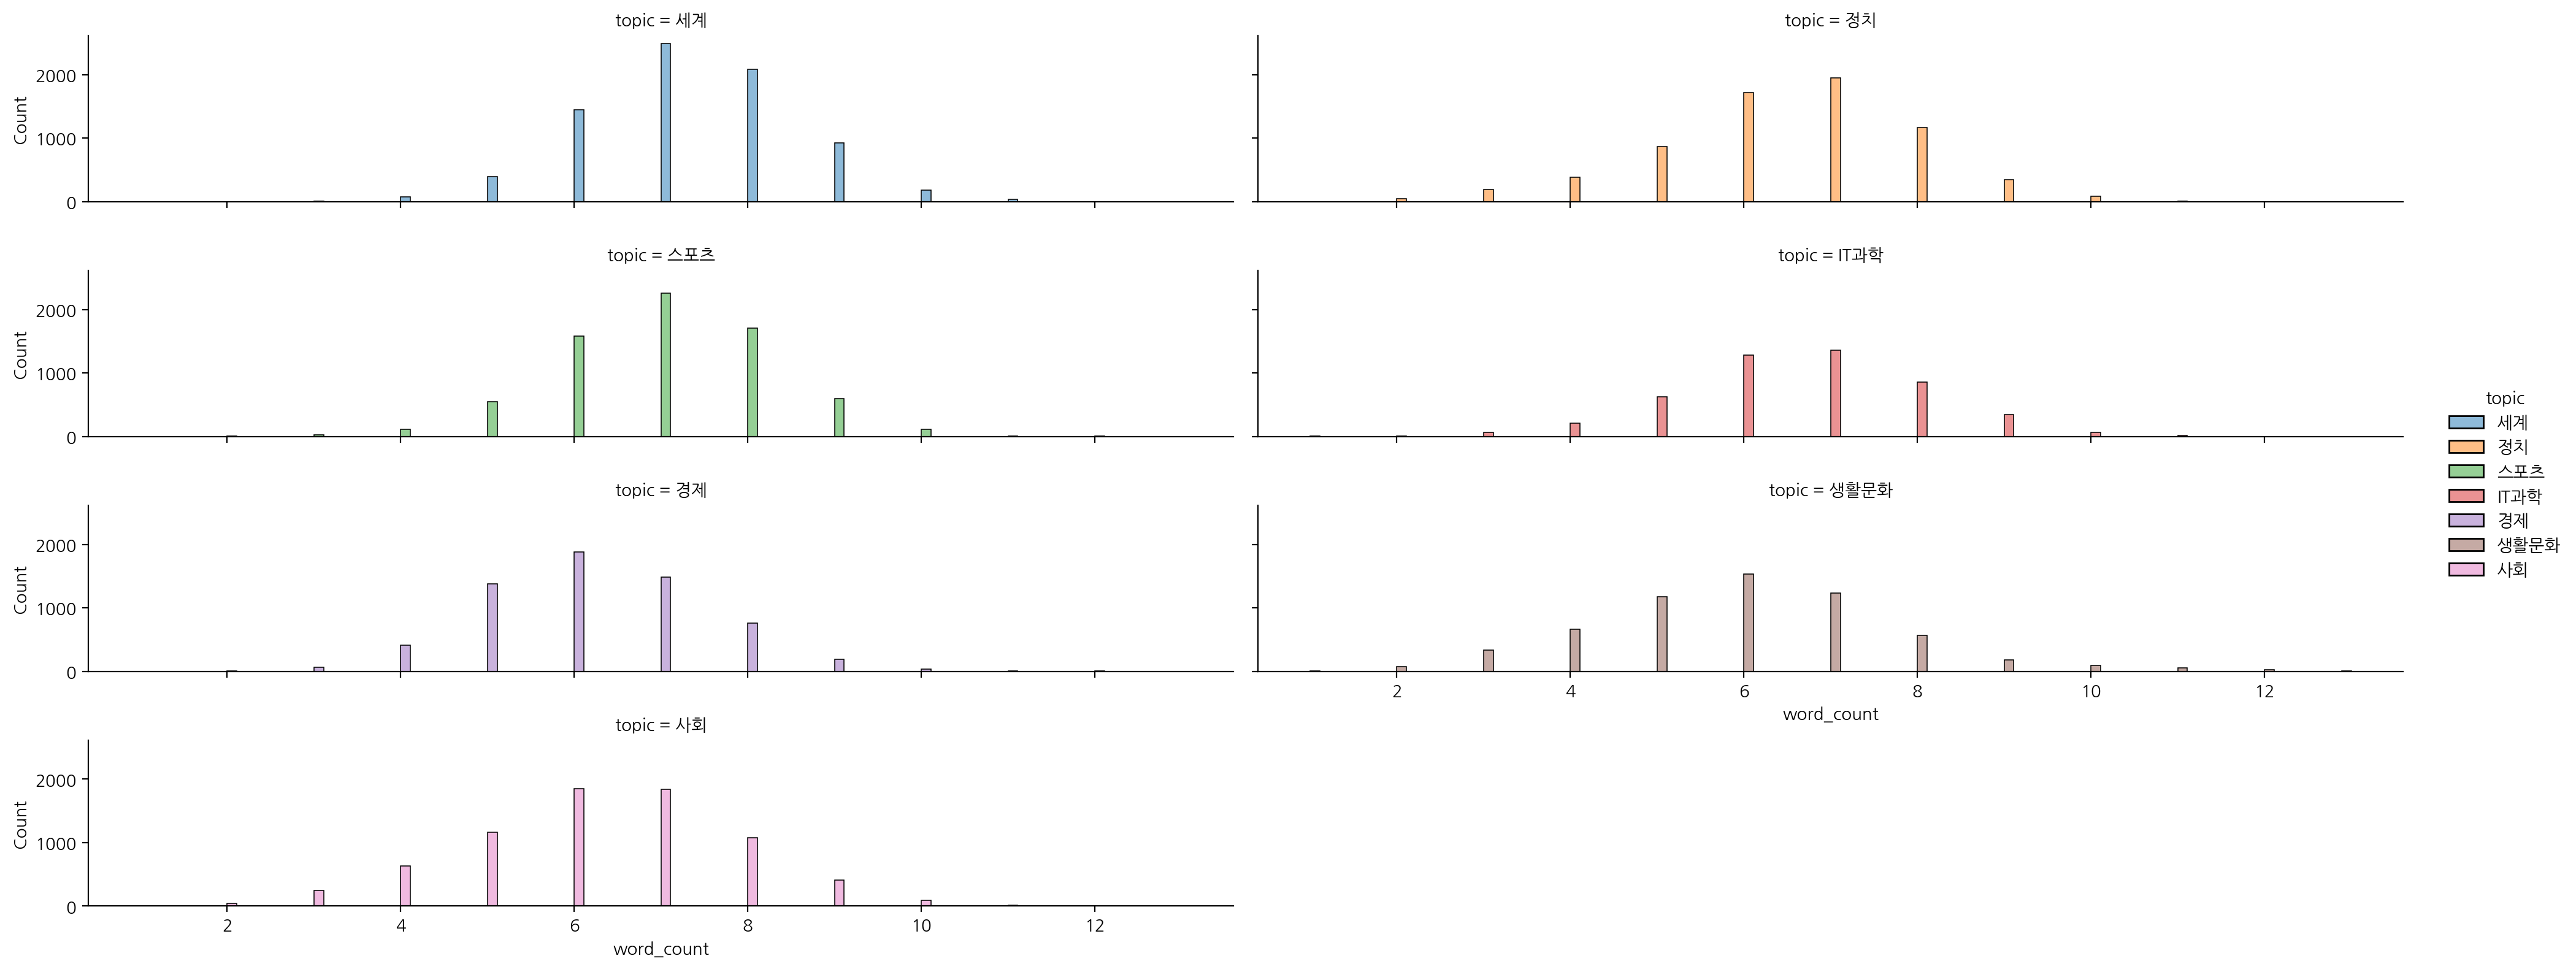

In [24]:
sns.displot(data=df, x='word_count',
            hue='topic', col='topic', col_wrap=2, aspect=5, height=2)
plt.show()

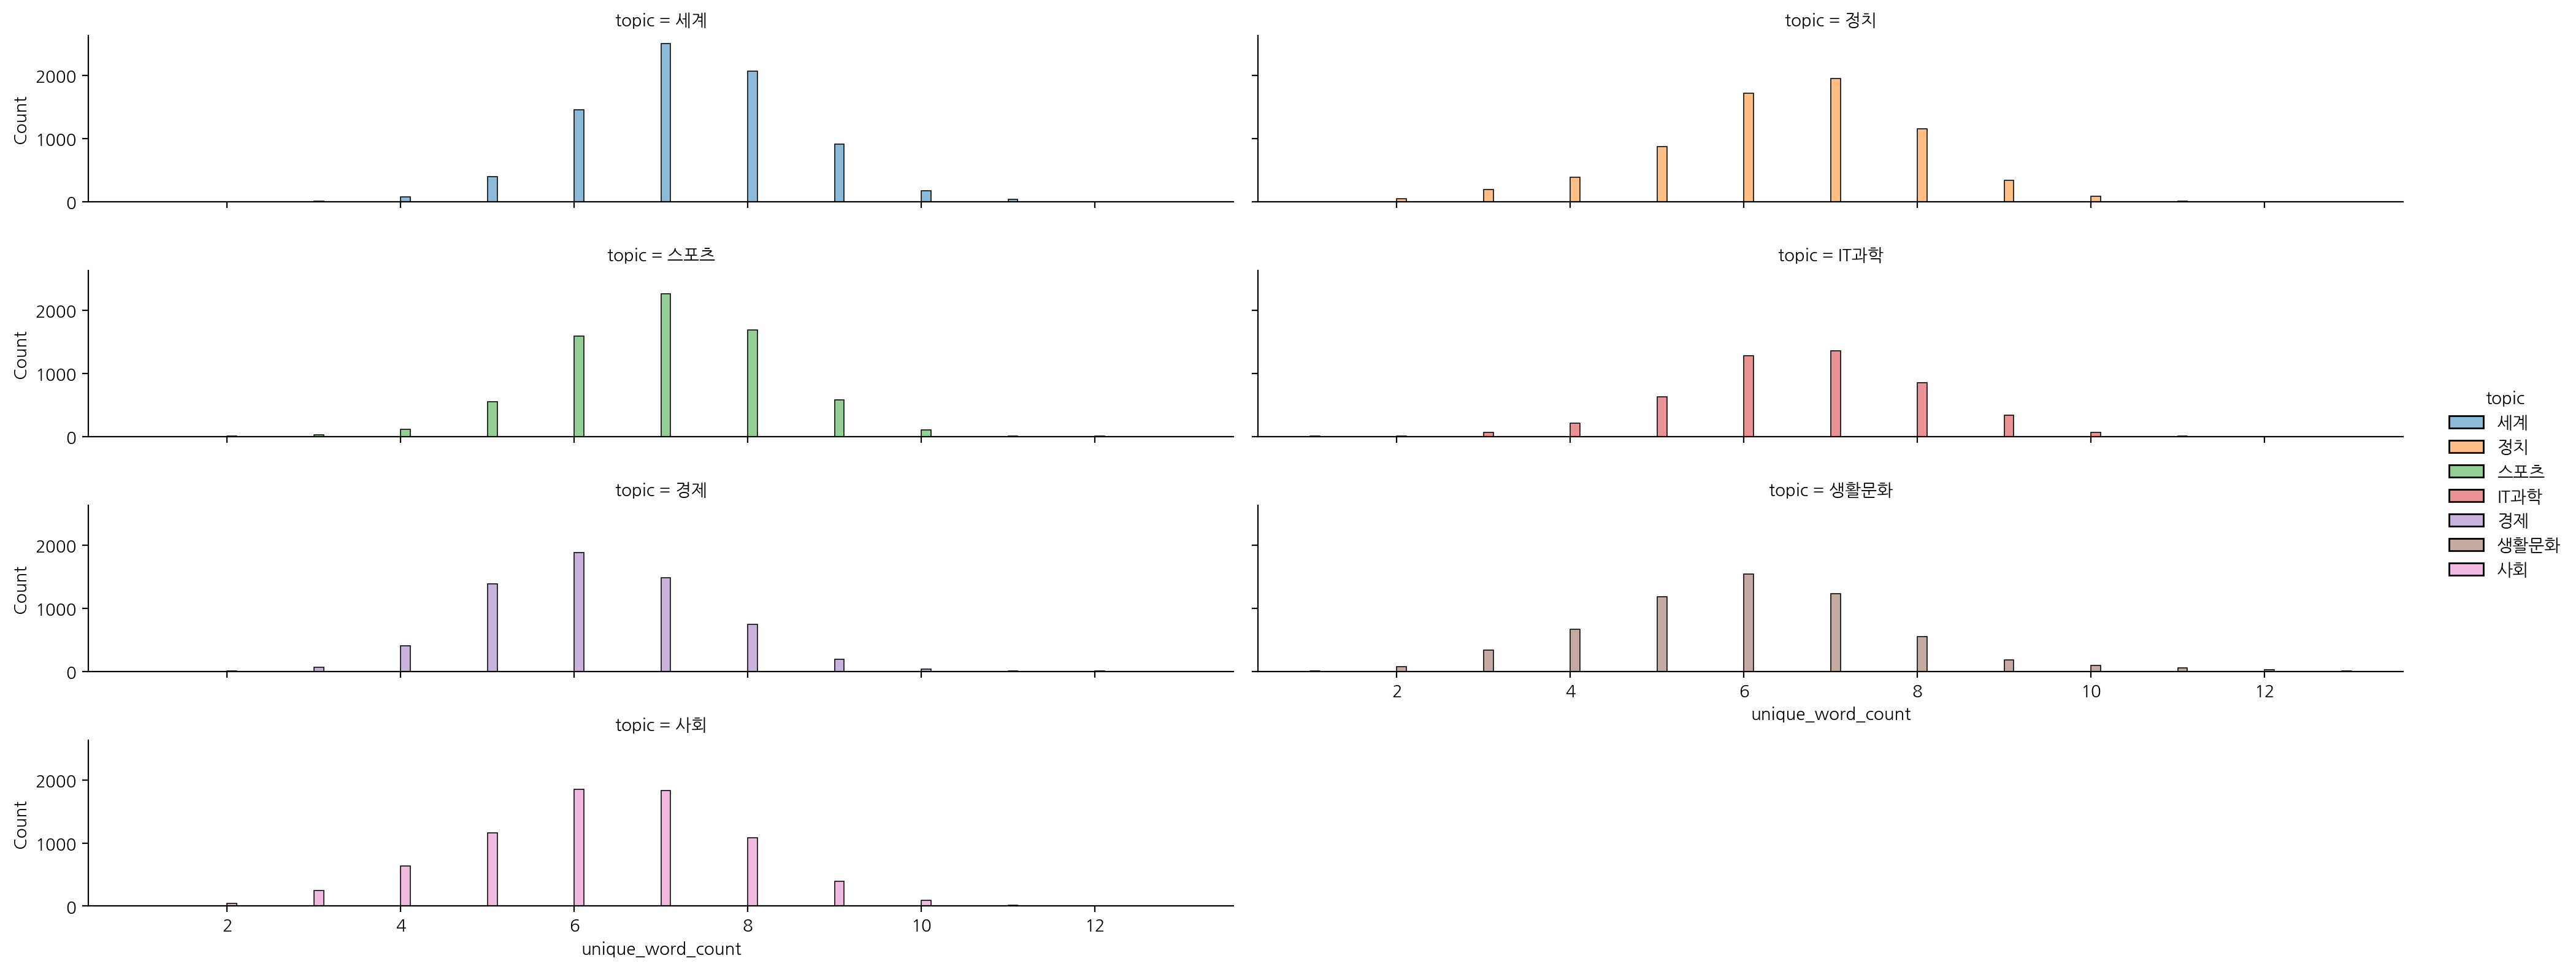

In [25]:
sns.displot(data=df, x='unique_word_count',
            hue='topic', col='topic', col_wrap=2, aspect=5, height=2)
plt.show()

## 문자 전처리하기

In [26]:
import re
# 익명함수인 lambda를 사용해 전처리할 수도 있지만
# Series.str.replace로 쓸 수도 있다
# df['title] = df['title].map(lambda x : re.sub('[0-9]', '', x))
df['title'] = df['title'].str.replace('[0-9]', '', regex=True)

In [27]:
df['title'] = df['title'].str.lower()

In [29]:
!pip install konlpy

  Obtaining dependency information for konlpy from https://files.pythonhosted.org/packages/5a/95/896914d9461c12f07e6f8afb1f7462e28395fc46b54fcbb96f1ea3cff8fb/konlpy-0.6.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for JPype1>=0.7.0 from https://files.pythonhosted.org/packages/1f/19/144f3a767b563ba5c6d4aa534ea1f3fad9a5067c3917df4458a6e1afe0ef/JPype1-1.5.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
    --------------------------------------- 0.4/19.4 MB 11.8 MB/s eta 0:00:02
   - -------------------------------------- 0.8/19.4 MB 13.2 MB/s eta 0:00:02
   -- ------------------------------------- 1.2/19.4 MB 11.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.8/19.4 MB 10.4 MB/s eta 0:00:02
   ---- ----------------------------------- 2.4/19.4 MB 10.9 MB/s eta 0:00:02
   ------ --------------------------------- 3.0/19.4 MB 11.1 MB/s eta 0:00:02
   ------- -------------------------------- 3.5/

In [30]:
# 형태소 분석기에서 Okt qnffjdhrl
from konlpy.tag import Okt
okt = Okt()

# 조사, 어미, 구두점 제거, 어간 추출

JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.